# This extra practice isn't part of the course
### I'm practicing course concepts on my own

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import sklearn

plt.style.use("ggplot")
tf.random.set_seed(1)

In [96]:
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="blue", label="Training Data")
    plt.scatter(test_data, test_labels, c="green", label="Testing Data")
    plt.scatter(test_data, predictions, c="red", label="Predictions")
    plt.legend()
    plt.show()


def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

# Boston house prices (regression)

In [97]:
# load the dataset
train, test = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=42
)
x_train, y_train = train
x_test, y_test = test
one = x_train[0]
# print(one)
# print(len(one))

# labels = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
# build the model
house_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2, name="hidden_layer1"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="Boston_housing_model")

# compile
house_model.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae"])

# fit
history = house_model.fit(x_train, y_train, epochs=100, verbose=0)

# predict
y_pred = house_model.predict(x_test)

4/4 [==============================] - 0s 549us/step


## Interpreting and visualizing results

In [102]:
print(f"Test data mean = {y_test.mean()}, standard deviation = {y_test.std()}")
print(f"Prediction mean = {y_pred.mean()}, standard deviation = {y_pred.std()}\n")

print("Prediction metrics:")
print(f"Mean absolute error = {mae(y_test, y_pred)}")
print(f"Mean squared error = {mse(y_test, y_pred)}")

Test data mean = 22.64019607843137, standard deviation = 8.438128449262853
Prediction mean = 20.92490005493164, standard deviation = 5.202452659606934

Prediction metrics:
Mean absolute error = 4.598468780517578
Mean squared error = 48.01731872558594


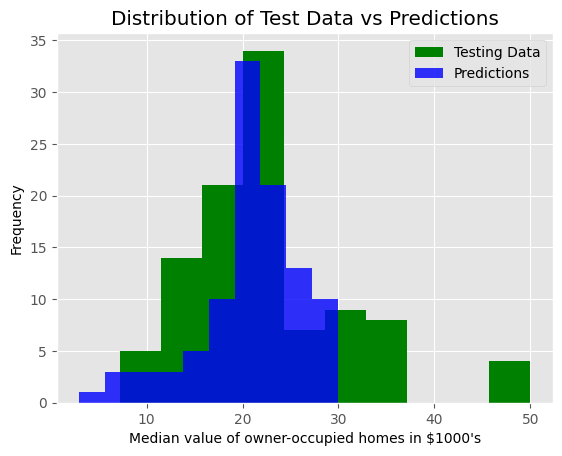

In [100]:
# compare distribution of test and prediction
plt.hist(y_test, color="green", label="Testing Data")
plt.hist(y_pred, color="blue", alpha=0.8, label="Predictions")
plt.title("Distribution of Test Data vs Predictions")
plt.xlabel("Median value of owner-occupied homes in $1000's")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Text(0, 0.5, 'loss')

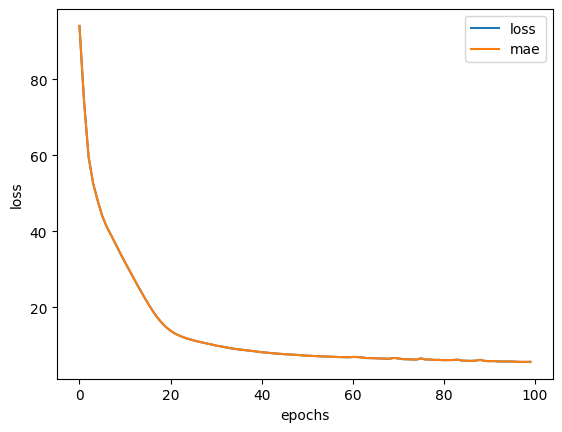

In [18]:
# plot the training improvement over time
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

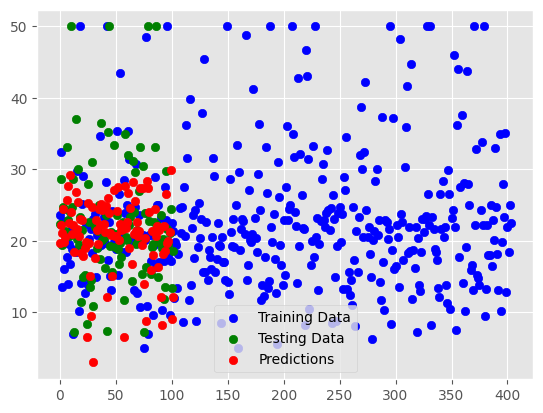

In [99]:
# plot the results. wait is this even informative

# plotting next to each other doesn't look as good
# fig, ax = plt.subplots(1, 2)
# ax[0].scatter((range(len(x_train))), y_train, c="blue", label="training_data")
# ax[0].scatter((range(len(y_test))), y_test, c="green", label="Testing Data")
# ax[0].scatter(range(len(y_pred)), y_pred, c="red", label="Predictions")

plt.scatter((range(len(x_train))), y_train, c="blue", label="Training Data")
plt.scatter((range(len(y_test))), y_test, c="green", label="Testing Data")
plt.scatter(range(len(y_pred)), y_pred, c="red", label="Predictions")
plt.legend()
plt.show()
